In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import API
from tqdm.notebook import tqdm as tqdm
import json
import requests
import geopandas as gpd
from shapely.geometry import Point, LineString
warnings.filterwarnings('ignore')

In [2]:
os.listdir('../1. Sales Data/')

['DMS Data (Jun-Sep2020)', 'KFC', 'Pizza Hut']

In [3]:
sales = pd.read_excel('../1. Sales Data/DMS Data (Jun-Sep2020)/DMS order_Jun-Sep2020 (Only store with DMS available).xlsx',
                   encoding = "ISO-8859-1")

In [4]:
sales

,日期,門店名稱,配送地址,下單時間,指派成功時間,騎手接單時間,到店取餐時間,取餐出發時間,訂單送達時間,預送達時間,Banner,Instant Order,收貨地址坐標,Rider
0,2020-06-01,KFCN032,紅磡 大環道 紅磡?第二期 紅昕樓 16 樓 1,2020-06-01 12:22:00,NaT,NaT,NaT,NaT,2020-06-01 13:06:00,2020-06-01 12:42:00,KFC,True,NaN,3rdParty
1,2020-06-01,KFCN032,紅磡 寶其利街 121 號 城中匯 17 樓,2020-06-01 19:23:00,2020-06-02 11:30:57,2020-06-02 11:30:57,2020-06-02 11:30:57,2020-06-02 11:30:57,2020-06-02 11:30:57,2020-06-01 19:43:00,KFC,True,"22.30471103465072,114.18992249816118",沒有操作完成
2,2020-06-01,KFCN032,紅磡 德豐街 9 號 黃埔花園9期百合苑 第四座 4 座 12 樓,2020-06-01 20:48:00,2020-06-02 11:30:57,2020-06-02 11:30:57,2020-06-02 11:30:57,2020-06-02 11:30:57,2020-06-02 11:30:57,2020-06-01 21:08:00,KFC,True,"22.301425410126207,114.19534318006106",沒有操作完成
3,2020-06-01,KFCN032,紅磡 愛景街 海濱南岸 第一座 1 座 28 樓,2020-06-01 14:37:00,2020-06-01 14:29:33,2020-06-01 14:29:49,2020-06-01 14:46:01,2020-06-01 14:46:08,2020-06-01 15:04:47,2020-06-01 14:57:00,KFC,True,NaN,3rdParty
4,2020-06-01,KFCN032,紅磡 戴亞街 紅磡?第一期 紅昇樓 紅昇?座 7 樓,2020-06-01 17:10:00,2020-06-01 17:04:34,2020-06-01 17:15:13,2020-06-01 17:25:19,2020-06-01 17:25:35,2020-06-01 17:31:48,2020-06-01 17:30:00,KFC,True,NaN,3rdParty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324300,2020-09-30,PHD638,沙田 牛皮沙街 愉翠苑 愉齊閣 H 座 7 樓 703 單位,2020-09-30 18:25:00,2020-09-30 18:54:02,2020-09-30 18:54:02,2020-09-30 18:54:18,2020-09-30 19:04:23,2020-09-30 19:18:30,2020-09-30 19:19:49,PHD,True,"22.377145121114435,114.20990885356511",Wai
324301,2020-09-30,PHD638,沙田 百利街 4 號 沙田第一城 第十六座 4,2020-09-30 19:46:00,2020-09-30 20:29:46,2020-09-30 20:29:46,2020-09-30 21:12:35,2020-09-30 21:12:36,2020-09-30 21:12:42,2020-09-30 21:00:28,PHD,True,"22.384738429641708,114.20653361118869",Chiu
324302,2020-09-30,PHD638,沙田 百得街 4 號 沙田第一城 第十九座 19 座 18 樓 E 單,2020-09-30 16:56:00,2020-09-30 18:25:15,2020-09-30 18:25:15,2020-09-30 18:52:07,2020-09-30 18:52:07,2020-09-30 19:11:57,2020-09-30 19:15:00,PHD,False,"22.383947464330248,114.20683361096987",Chiu
324303,2020-09-30,PHD638,沙田 銀城街 19 號 愉和閣 B 座 4 樓 6 單,2020-09-30 18:05:00,2020-09-30 18:06:01,2020-09-30 18:06:01,2020-09-30 18:06:12,2020-09-30 18:19:32,2020-09-30 18:52:15,2020-09-30 18:49:16,PHD,True,"22.38027279238,114.20705562139293",Chiu


In [110]:
sales['門店名稱'].unique()

array(['KFCN032', 'KFCN047', 'KFCN080', 'KFCN103', 'KFCN122', 'KFCN133',
       'KFCN135', 'KFCN137', 'KFCN140', 'KFCN150', 'KFCN151', 'KFCN166',
       'KFCN173', 'PH01', 'PH152', 'PH164', 'PH202', 'PH34', 'PH39',
       'PH48', 'PH52', 'PH54', 'PH56', 'PH57', 'PH62', 'PH64', 'PH65',
       'PH70', 'PH71', 'PH72', 'PH75', 'PH79', 'PH82', 'PH83', 'PH84',
       'PH86', 'PH88', 'PHD602', 'PHD606', 'PHD609', 'PHD616', 'PHD628',
       'PHD629', 'PHD633', 'KFCN130', 'PHD618', 'PHD625', 'PHD631',
       'PHD601', 'PHD603', 'PHD605', 'PHD610', 'PHD611', 'PHD612',
       'PHD619', 'PHD620', 'PHD623', 'PHD624', 'PHD626', 'PHD627',
       'PHD634', 'PHD635', 'PHD636', 'PHD637', 'PHD638', 'KFCN182',
       'PHD621', 'KFCN045', 'KFCN050', 'KFCN141', 'KFCN145', 'KFCN148',
       'KFCN185', 'KFCN161', 'PH15', 'PH153', 'PH24', 'PH59', 'PH05',
       'PH10', 'PH11', 'PH23', 'PH53', 'PH69', 'KFCN005', 'KFCN079',
       'KFCN101', 'KFCN105', 'KFCN125', 'KFCN142', 'KFCN155', 'KFCN170',
       'KFCN171'

In [111]:
sales.columns

Index(['日期', '門店名稱', '配送地址', '下單時間', '指派成功時間', '騎手接單時間', '到店取餐時間', '取餐出發時間',
       '訂單送達時間', '預送達時間', 'Banner', 'Instant Order', '收貨地址坐標', 'Rider'],
      dtype='object')

In [112]:
sales = sales.dropna()

In [113]:
sales.iloc[0,11]

True

In [114]:
sales = sales.loc[sales['Rider']!='沒有操作完成']
sales = sales.loc[sales['Instant Order']==True]

In [115]:
sales.shape

(225113, 14)

In [116]:
for col in ['下單時間', '指派成功時間', '騎手接單時間', '到店取餐時間', '取餐出發時間',
       '訂單送達時間', '預送達時間']:
    sales[col] = pd.to_datetime(sales[col])

In [150]:
sales['EstimateArrivalGap'] = (sales['預送達時間'] - sales['訂單送達時間']) / np.timedelta64(1, 'm')
sales['TripTime'] = (sales['訂單送達時間'] - sales['取餐出發時間']) / np.timedelta64(1, 'm')
sales['TicketWaitingTime'] = (sales['指派成功時間'] - sales['下單時間']) / np.timedelta64(1, 'm') 
sales['FoodPreparationTime'] = (sales['取餐出發時間'] - sales['下單時間']) / np.timedelta64(1, 'm')
sales['TotalWaitingTime'] = (sales['訂單送達時間'] - sales['下單時間']) / np.timedelta64(1, 'm')

In [151]:
sales.describe()

,EstimateArrivalGap,TripTime,TicketWaitingTime,FoodPreparationTime,TotalWaitingTime
count,147507.000000,147507.000000,147507.000000,147507.000000,147507.000000
mean,8.820699,19.137827,9.602670,20.061778,39.199605
std,14.975596,11.267625,8.506789,9.437608,13.429589
min,-59.633333,2.016667,0.016667,0.150000,2.983333
25%,0.050000,10.600000,2.033333,13.900000,29.266667
50%,8.750000,16.600000,7.016667,18.916667,37.100000
75%,17.516667,25.383333,16.050000,25.533333,46.883333
max,59.966667,59.983333,29.983333,116.516667,159.666667


In [152]:
sales = sales.loc[(sales['TicketWaitingTime'] > 0)&(sales['TicketWaitingTime'] < 30)]
sales = sales.loc[(sales['TripTime'] > 2)&(sales['TripTime'] < 60)]
sales = sales.loc[(sales['EstimateArrivalGap'] > -60)&(sales['EstimateArrivalGap'] < 60)]

In [153]:
sales.describe()

,EstimateArrivalGap,TripTime,TicketWaitingTime,FoodPreparationTime,TotalWaitingTime
count,147507.000000,147507.000000,147507.000000,147507.000000,147507.000000
mean,8.820699,19.137827,9.602670,20.061778,39.199605
std,14.975596,11.267625,8.506789,9.437608,13.429589
min,-59.633333,2.016667,0.016667,0.150000,2.983333
25%,0.050000,10.600000,2.033333,13.900000,29.266667
50%,8.750000,16.600000,7.016667,18.916667,37.100000
75%,17.516667,25.383333,16.050000,25.533333,46.883333
max,59.966667,59.983333,29.983333,116.516667,159.666667


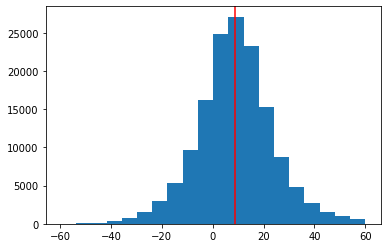

In [154]:
_ = plt.hist(sales['EstimateArrivalGap'],bins=20)
_ = plt.axvline(sales['EstimateArrivalGap'].mean(), color='red')
# plt.title('Gap between order ')

In [155]:
len(sales.loc[sales['EstimateArrivalGap']>0]) / len(sales)

0.7510558820937312

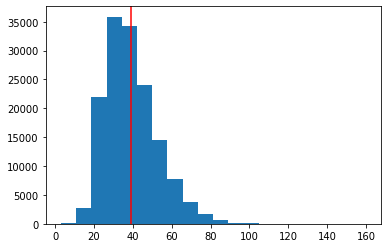

In [157]:
_ = plt.hist(sales['TotalWaitingTime'],bins=20)
_ = plt.axvline(sales['TotalWaitingTime'].mean(), color='red')

In [224]:
sales['TotalWaitingTime'].mean()

39.199604651530436

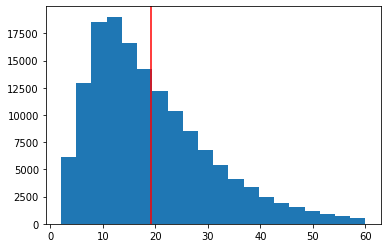

In [156]:
_ = plt.hist(sales['TripTime'],bins=20)
_ = plt.axvline(sales['TripTime'].mean(), color='red')

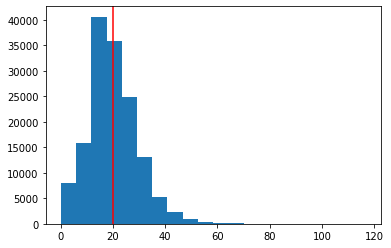

In [124]:
_ = plt.hist(sales['FoodPreparationTime'],bins=20)
_ = plt.axvline(sales['FoodPreparationTime'].mean(), color='red')

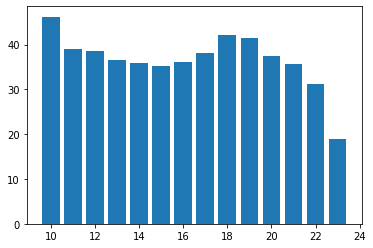

In [158]:
TripDurationTimeinHour = sales.groupby(sales['下單時間'].dt.hour).agg({'TotalWaitingTime':'mean'})
_ = plt.bar(TripDurationTimeinHour.index, TripDurationTimeinHour['TotalWaitingTime'])

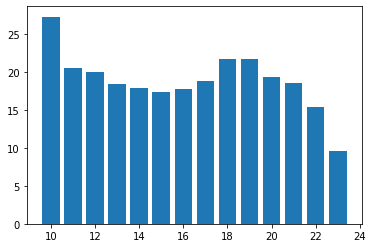

In [159]:
FoodPreparationTimeinHour = sales.groupby(sales['下單時間'].dt.hour).agg({'FoodPreparationTime':'mean'})
_ = plt.bar(FoodPreparationTimeinHour.index, FoodPreparationTimeinHour['FoodPreparationTime'])

In [160]:
sales.columns

Index(['日期', '門店名稱', '配送地址', '下單時間', '指派成功時間', '騎手接單時間', '到店取餐時間', '取餐出發時間',
       '訂單送達時間', '預送達時間', 'Banner', 'Instant Order', '收貨地址坐標', 'Rider',
       'EstimateArrivalGap', 'TripTime', 'TicketWaitingTime',
       'FoodPreparationTime', 'TotalWaitingTime'],
      dtype='object')

In [222]:
sales['orderHour'] = sales['下單時間'].dt.hour
peakHourinStore = sales.groupby(['門店名稱','orderHour']).agg({'配送地址':'count'}).\
reset_index()
peakHourinStore = peakHourinStore.loc[peakHourinStore['配送地址']>49]


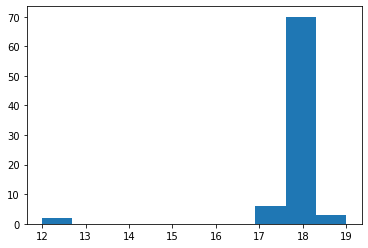

In [223]:
idx = peakHourinStore.groupby(['門店名稱'])['配送地址'].transform(max) == peakHourinStore['配送地址']
peakHourinStore['maxHour'] = idx
peakHourinStore = peakHourinStore.loc[peakHourinStore['maxHour']==True]
_ = plt.hist(peakHourinStore['orderHour'])

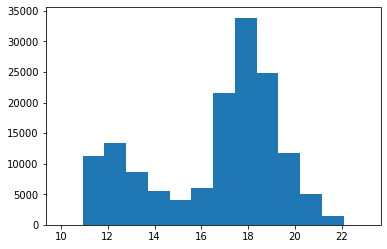

In [178]:
_ = plt.hist(sales['下單時間'].dt.hour,bins=14)

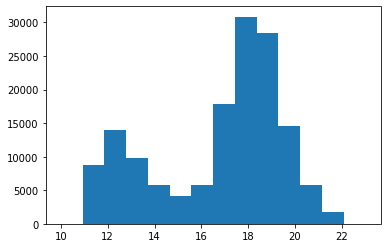

In [125]:
_ = plt.hist(sales['騎手接單時間'].dt.hour,bins=14)

In [126]:
sales.shape

(147507, 18)

In [225]:
KFC = pd.read_excel('../2. Store location and information/KFC Store list.xlsx')
KFC['Store'] = 'KFC' + KFC['Store']

In [226]:
'123'.zfill(2)

'123'

In [227]:
sales['門店名稱'].unique()

array(['KFCN103', 'KFCN122', 'KFCN151', 'PH01', 'PH152', 'PH164', 'PH202',
       'PH39', 'PH48', 'PH52', 'PH54', 'PH56', 'PH57', 'PH62', 'PH64',
       'PH65', 'PH70', 'PH71', 'PH72', 'PH75', 'PH79', 'PH82', 'PH83',
       'PH84', 'PH86', 'PH88', 'PHD602', 'PHD606', 'PHD609', 'PHD616',
       'PHD628', 'PHD629', 'PHD633', 'KFCN137', 'PH34', 'KFCN166',
       'KFCN150', 'PHD625', 'PHD627', 'PHD635', 'KFCN182', 'PHD601',
       'PHD603', 'PHD605', 'PHD610', 'PHD611', 'PHD612', 'PHD618',
       'PHD619', 'PHD620', 'PHD621', 'PHD623', 'PHD624', 'PHD626',
       'PHD631', 'PHD634', 'PHD636', 'PHD637', 'PHD638', 'KFCN080',
       'KFCN135', 'PH59', 'PH10', 'PH11', 'PH15', 'PH23', 'PH24', 'PH53',
       'PH69', 'KFCN101', 'KFCN079', 'PH05', 'KFCN125', 'PH153',
       'KFCN173', 'KFCN032', 'KFCN133', 'KFCN045', 'PH19', 'PH200',
       'PH210', 'PH63', 'PH78', 'PH09', 'PH156', 'PH30', 'PH50', 'PH51',
       'PH67', 'PH155', 'PH208', 'PH32', 'PH36', 'PH159', 'PH16', 'PH17',
       'PH212', 'PH2

In [231]:
PH = pd.read_excel('../2. Store location and information/PH SHOP ADDRESS.xls')
PH['Shop'] = 'PH' + PH['Shop'].apply(lambda x: str(x).zfill(2))

In [232]:
PHD = pd.read_excel('../2. Store location and information/PH SHOP ADDRESS.xls',sheet_name=1)
PHD['Shop'] = 'PHD' + PHD['Shop'].apply(lambda x: str(x).zfill(2))

In [233]:
address = KFC['Address'].values.tolist() + PHD['Address'].values.tolist() + PH['Address'].values.tolist()
storeCode = KFC['Store'].values.tolist() + PHD['Shop'].values.tolist() + PH['Shop'].values.tolist()

In [251]:

key = API.key
f = open("geocoding.csv", "w")
f.write("storeCode,lat,lon\n")
for index,location in enumerate(address):


    f = open("geocoding.csv", "a")
    location = location
    url = 'https://maps.googleapis.com/maps/api/geocode/json?address=香港'+location+'&key='+key
    data = requests.get(url)
    text = json.loads(data.text)
    if text['results'] == []:
        pass
    else:
        lat = str(text['results'][0]['geometry']['location']['lat'])
        lng = str(text['results'][0]['geometry']['location']['lng'])
        f.write(storeCode[index]+','+lat+','+lng+'\n')
        f.close()

In [252]:
latlon = pd.read_csv('geocoding.csv')

In [253]:
latlon

,storeCode,lat,lon
0,KFCN005,22.286214,114.153966
1,KFCN026,22.281572,114.157753
2,KFCN032,22.306068,114.190308
3,KFCN045,22.373829,114.116297
4,KFCN046,22.492880,114.139206
...,...,...,...
182,PH210,22.317643,114.236325
183,PH211,22.207183,113.554383
184,PH212,22.296527,114.239619
185,PH213,22.296005,113.950163


In [258]:
sales.merge(latlon,left_on='門店名稱',right_on='storeCode').to_csv('DeliveryRecord.csv',index=False)

In [31]:
records = pd.read_csv('DeliveryRecord.csv')

In [32]:
records['DLatLon'] = records.apply(lambda x: Point(float(x['收貨地址坐標'].split(',')[1]),
                                                   float(x['收貨地址坐標'].split(',')[0])),axis=1)

In [33]:
records['OLatLon'] = records.apply(lambda x: Point(float(x['lon']),float(x['lat'])),axis=1)

In [34]:
records['geometry'] = records.apply(lambda x: LineString([x['OLatLon'],x['DLatLon']]),axis=1)

In [35]:
records.columns

Index(['日期', '門店名稱', '配送地址', '下單時間', '指派成功時間', '騎手接單時間', '到店取餐時間', '取餐出發時間',
       '訂單送達時間', '預送達時間', 'Banner', 'Instant Order', '收貨地址坐標', 'Rider',
       'EstimateArrivalGap', 'TripTime', 'TicketWaitingTime',
       'FoodPreparationTime', 'TotalWaitingTime', 'orderHour', 'storeCode',
       'lat', 'lon', 'DLatLon', 'OLatLon', 'geometry'],
      dtype='object')

In [45]:
records = records[['日期','下單時間','geometry','storeCode']]
records['OrderTime'] = records['下單時間'].apply(lambda x: int(x.split(' ')[1].split(':')[0]))
records['Month'] = records['日期'].apply(lambda x: int(x.split('-')[1]))
records =  records.loc[records['Month']==6]
records = gpd.GeoDataFrame(records,geometry='geometry',crs={'init': 'epsg:4326'})

In [46]:
records.to_file('network.geojson',driver="GeoJSON")

In [44]:
records['日期'].unique()

array(['2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
       '2020-06-05', '2020-06-06', '2020-06-08', '2020-06-09',
       '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13',
       '2020-06-15', '2020-06-17', '2020-06-18', '2020-06-19',
       '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
       '2020-06-26', '2020-06-29', '2020-06-30', '2020-07-01',
       '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-06',
       '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
       '2020-07-11', '2020-07-13', '2020-07-14', '2020-07-16',
       '2020-07-18', '2020-07-20', '2020-07-21', '2020-07-22',
       '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
       '2020-07-27', '2020-07-28', '2020-07-29', '2020-08-02',
       '2020-08-03', '2020-08-04', '2020-08-06', '2020-08-08',
       '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-14',
       '2020-08-15', '2020-08-17', '2020-08-18', '2020-08-19',
       '2020-08-20', '2020-08-21', '2020-08-22', '2020-